# packages 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Data

In [108]:
#dummy data to test clustering
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Implementation of kmeans

In [109]:
class Kmeans:
    def __init__(self,k,max_iter=1000,random_state=42):
        self.k=k
        self.max_iter=max_iter
        self.random_state=random_state
        
    
    def kMeansInitCentroids(self,X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.k]]
        return centroids
    
    def findClosestCentroids(self,X, centroids):
        self.idx=np.zeros((X.shape[0]),dtype=int)
        for i in range(X.shape[0]) :
            distance=np.linalg.norm(centroids-X[i,:],axis=1)
            self.idx[i]=np.argmin(distance,axis=0)
    
        return self.idx
    
    
    def computeCentroids(self,X):
        centroids=np.zeros((self.k,X.shape[1]))
        for i in range(self.k):
            centroids[i, :] = np.mean(X[self.idx == i, :], axis=0)

        return centroids
    
    
    def fit(self, X):
        self.centroids=self.kMeansInitCentroids(X)
        for i in range(self.max_iter):
            old_centroids=self.centroids
            self.idx=self.findClosestCentroids(X, self.centroids)
            self.centroids=self.computeCentroids(X)
            if np.all(old_centroids==self.centroids):
                break
    
    def predict(self,X):
        return self.findClosestCentroids(X,self.centroids)
    
    def labels(self):
        return self.idx
    
    def distortion(self,X):
        distances = np.zeros(self.k)
        for i in range(self.k):
            distances[i]=np.sum(np.linalg.norm(X[self.idx == self.k-1] - self.centroids[self.k-1], axis=1))
            
        return np.sum(np.square(distances))
        

In [110]:
model=Kmeans(2)

In [111]:
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

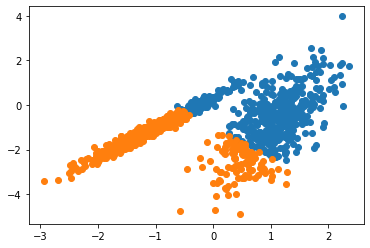

In [112]:
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

In [113]:
model.distortion(X)

538535.2546034959

# kmeans in sklearn

In [114]:
model = KMeans(n_clusters=2)

In [115]:
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

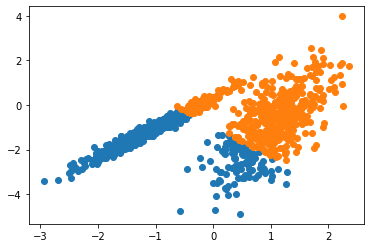

In [116]:
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

# Elbow method and best number of clusters

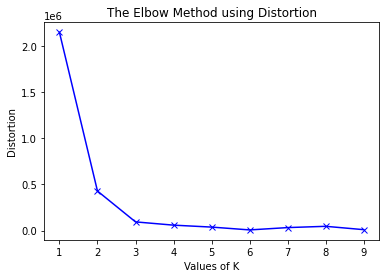

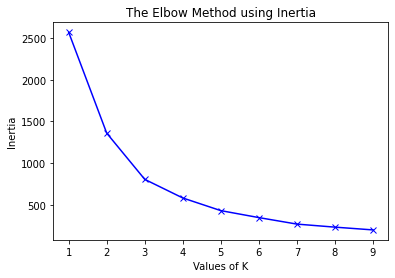

In [117]:
K = range(1, 10)
distortions=[]
inertias=[]
for k in K:
    # Building and fitting the model
    kmeanModel_sklearn = KMeans(n_clusters=k).fit(X)
    kmeanModel_implementation = Kmeans(k)
    kmeanModel_implementation.fit(X)
    distortions.append(kmeanModel_implementation.distortion(X))
    inertias.append(kmeanModel_sklearn.inertia_)
 

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [118]:
#the best number of clusters
def best_no_cluster(k,inertia):
    variation=np.zeros(k-1)
    for i in range(k-1):
        variation[i]=inertia[i+1]-inertia[i]
    
    return np.argmax(variation)

In [119]:
best_no_cluster(9,distortions)

5

In [120]:
best_no_cluster(9,inertias)

7